In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def RRF(v, k, ang):
    matrix = v*np.cos(ang) + np.cross(k, v)*np.sin(ang) + k*np.dot(k, v)*(1 - np.cos(ang))
    return matrix

p = 1.085/2
#p = 0.5*np.sqrt((0.450+0.425)**2 + (0.350+0.350)**2)
w = RRF(np.array([p, 0, 0]), np.array([0,0,1]), np.deg2rad(60))
#rotates the point (0,p) 60 deg to the right
slope = (p - w[0])/w[1]

vertx = np.zeros(1000) + w[1]
verty = np.linspace(-w[0], w[0], 1000)


sidey1 = []
sidey4 = []
posxs = np.linspace(0, w[1], 1000)

for i in posxs:
    sidey1.append(-i*(slope) + p)
    sidey4.append(i*(slope) - p)

sidey2 = []
sidey3 = []
negxs = np.linspace(-w[1], 0, 1000)
for i in negxs:
    sidey2.append(i*(slope) + p)
    sidey3.append(-i*(slope) - p)

Hexagonx = [*vertx, *posxs, *negxs, *-vertx, *negxs, *posxs]
Hexagony = [*verty, *sidey1, *sidey2, *verty, *sidey3, *sidey4]
ax = np.zeros(100)
ay = np.arange(-0.5, 0.5, 0.5/50)

In [3]:
df = pd.read_csv('1120m_rand_angs.csv')

In [4]:
df.describe()

,Point 1 X,Point 1 Y,Point 1 Z,Point 2 X,Point 2 Y,Point 2 Z,Phi,Theta,Length
count,6.499970e+06,6.499970e+06,6.499970e+06,6.499970e+06,6.499970e+06,6.499970e+06,6.499970e+06,6.499970e+06,6.499970e+06
mean,3.220166e-02,5.578376e-02,1.115463e-01,-3.222442e-02,-5.557529e-02,-1.117371e-01,-5.767991e-03,1.799684e+02,7.980816e-01
std,3.457440e-01,3.239669e-01,3.136029e-01,2.699071e-01,2.884977e-01,4.281816e-01,5.195669e+01,1.039307e+02,2.832981e-01
min,-4.852110e-01,-5.602729e-01,-4.999989e-01,-4.852110e-01,-5.602731e-01,-5.000000e-01,-8.999997e+01,2.959394e-06,5.455482e-04
25%,-2.815363e-01,-2.188965e-01,-1.549411e-01,-2.496331e-01,-3.107192e-01,-5.000000e-01,-4.500819e+01,8.992268e+01,5.856189e-01
50%,4.711509e-02,7.661742e-02,1.238841e-01,-3.037875e-02,-6.402842e-02,-3.379894e-01,-7.562555e-03,1.800246e+02,8.761950e-01
75%,3.725404e-01,3.506192e-01,4.429374e-01,1.870178e-01,1.818381e-01,4.348152e-01,4.500195e+01,2.699429e+02,1.016177e+00
max,4.852110e-01,5.602725e-01,5.000000e-01,4.852100e-01,5.602720e-01,5.000000e-01,8.999999e+01,3.600000e+02,1.478901e+00


(array([162189., 162103., 162246., 162559., 163250., 162990., 162979.,
        162779., 162281., 161882., 162377., 162945., 162609., 161676.,
        161972., 162619., 162643., 162376., 162394., 163396., 162421.,
        162943., 162202., 162541., 162454., 162568., 162478., 162487.,
        162293., 162261., 162960., 162257., 162557., 163192., 162514.,
        162686., 161570., 162423., 162607., 162291.]),
 array([-8.99999726e+01, -8.54999735e+01, -8.09999744e+01, -7.64999754e+01,
        -7.19999763e+01, -6.74999773e+01, -6.29999782e+01, -5.84999791e+01,
        -5.39999801e+01, -4.94999810e+01, -4.49999819e+01, -4.04999829e+01,
        -3.59999838e+01, -3.14999848e+01, -2.69999857e+01, -2.24999866e+01,
        -1.79999876e+01, -1.34999885e+01, -8.99998946e+00, -4.49999039e+00,
         8.66644163e-06,  4.50000773e+00,  9.00000679e+00,  1.35000059e+01,
         1.80000049e+01,  2.25000040e+01,  2.70000030e+01,  3.15000021e+01,
         3.60000012e+01,  4.05000002e+01,  4.49999993e+01,

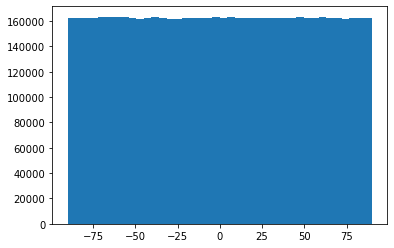

In [5]:
plt.hist(df['Phi'], bins = 40)

(array([162558., 162751., 162721., 162393., 162651., 162519., 162844.,
        162700., 162628., 162595., 162437., 162562., 162853., 162610.,
        161901., 162136., 161784., 162029., 163139., 161738., 162369.,
        162265., 163137., 162642., 163430., 162545., 162516., 162115.,
        162374., 163109., 162428., 162335., 162286., 161987., 162214.,
        162618., 162773., 162979., 162362., 161937.]),
 array([2.95939365e-06, 9.00000271e+00, 1.80000025e+01, 2.70000022e+01,
        3.60000020e+01, 4.50000017e+01, 5.40000015e+01, 6.30000012e+01,
        7.20000010e+01, 8.10000007e+01, 9.00000005e+01, 9.90000002e+01,
        1.08000000e+02, 1.17000000e+02, 1.25999999e+02, 1.34999999e+02,
        1.43999999e+02, 1.52999999e+02, 1.61999998e+02, 1.70999998e+02,
        1.79999998e+02, 1.88999998e+02, 1.97999997e+02, 2.06999997e+02,
        2.15999997e+02, 2.24999997e+02, 2.33999996e+02, 2.42999996e+02,
        2.51999996e+02, 2.60999996e+02, 2.69999995e+02, 2.78999995e+02,
        2.8799

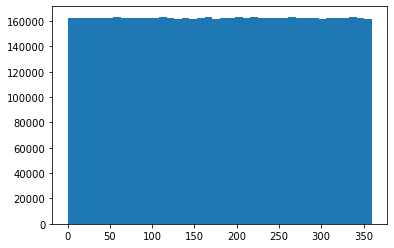

In [6]:
plt.hist(df['Theta'], bins = 40)

(array([8.85000e+02, 2.54100e+03, 4.18200e+03, 6.01200e+03, 7.87800e+03,
        9.66800e+03, 1.15510e+04, 1.36260e+04, 1.56560e+04, 1.81330e+04,
        2.02430e+04, 2.24190e+04, 2.49250e+04, 2.76320e+04, 2.96570e+04,
        3.25620e+04, 3.49330e+04, 3.77310e+04, 4.00420e+04, 4.25950e+04,
        4.52760e+04, 4.80310e+04, 5.01980e+04, 5.30880e+04, 5.52810e+04,
        5.78440e+04, 6.01400e+04, 6.21380e+04, 6.42810e+04, 6.56390e+04,
        6.69170e+04, 6.83810e+04, 6.90180e+04, 6.93250e+04, 6.93370e+04,
        6.92120e+04, 6.90870e+04, 6.89230e+04, 6.92950e+04, 7.09850e+04,
        7.30290e+04, 7.49240e+04, 7.65860e+04, 7.85480e+04, 7.99580e+04,
        8.10500e+04, 8.26050e+04, 8.32420e+04, 8.44550e+04, 8.52630e+04,
        8.50740e+04, 8.60600e+04, 8.58460e+04, 8.59670e+04, 8.63500e+04,
        8.69310e+04, 8.62000e+04, 8.61780e+04, 8.65010e+04, 8.56120e+04,
        8.56840e+04, 8.55590e+04, 8.53580e+04, 8.49230e+04, 8.41930e+04,
        1.16126e+05, 1.51307e+05, 5.46929e+05, 4.22

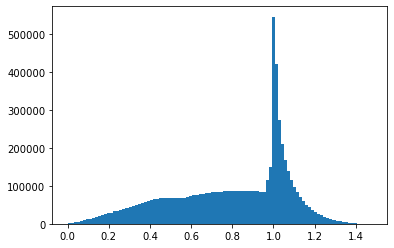

In [7]:
plt.hist(df['Length'], bins = 100)

<ipython-input-13-354868570524>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tester = df[df['Length'] >= 0.8][df['Length'] <= 0.999]['Length']


0.8798959358898762


<IPython.core.display.Javascript object>


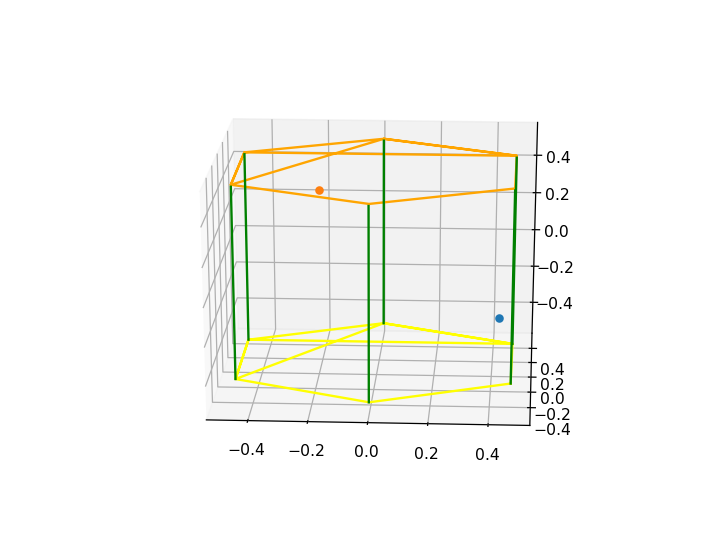

In [13]:
tester = df[df['Length'] >= 0.8][df['Length'] <= 0.999]['Length']
yeet = np.random.randint(0, len(tester))

leng = tester.iloc[yeet]
print(leng)
point = np.where(df['Length'] == leng)[0]


%matplotlib notebook
plt3d = plt.figure().gca(projection='3d')

plt3d.plot(Hexagonx, Hexagony, -0.5, color = 'yellow')
plt3d.plot(Hexagonx, Hexagony, 0.5, color = 'orange')
plt3d.plot(ax + p, ay, 0, zdir = 'x', color = 'green')
plt3d.plot(ax - p, ay, 0, zdir = 'x', color = 'green')
plt3d.plot(ax + w[0], ay, w[1], zdir = 'x', color = 'green')
plt3d.plot(ax - w[0], ay, w[1], zdir = 'x', color = 'green')
plt3d.plot(ax + w[0], ay, -w[1], zdir = 'x', color = 'green')
plt3d.plot(ax - w[0], ay, -w[1], zdir = 'x', color = 'green')
plt3d.scatter(df['Point 1 X'][point[0]],df['Point 1 Y'][point[0]],df['Point 1 Z'][point[0]])
plt3d.scatter(df['Point 2 X'][point[0]],df['Point 2 Y'][point[0]],df['Point 2 Z'][point[0]])